# plotting phased markers

In [5]:
.libPaths(new = "/workspace/hraczw/R_packages")
BiocManager::install("karyoploteR", lib = "/workspace/hraczw/R_packages")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://ppm.powerplant.pfr.co.nz/cran/latest

Bioconductor version 3.18 (BiocManager 1.30.23), R 4.3.3 (2024-02-29)

Installing package(s) 'karyoploteR'

also installing the dependencies 'regioneR', 'bezier', 'bamsignals'




In [2]:
library(karyoploteR, lib.loc = '/workspace/hraczw/R_packages')

Loading required package: regioneR

Loading required package: GenomicRanges

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: 'BiocGenerics'


The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs


The following objects are masked from 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors


Attaching package: 'S4Vectors'


The following object is masked from 'package:utils':

    findMatches


The following objects are masked from 'package:base':

    expand.grid, I, unname


Loading required package: IRanges

Loading

In [3]:
custom.genome <- toGRanges("chr2.range")
custom.cytobands <- toGRanges("chr2.cytobands.txt")

No predefined canonical chromosomes found for the requested genome. Applying a heuristic chromosome filtering.

To get the unfiltered genome, please set chromosomes="all" in the plotKaryotype call



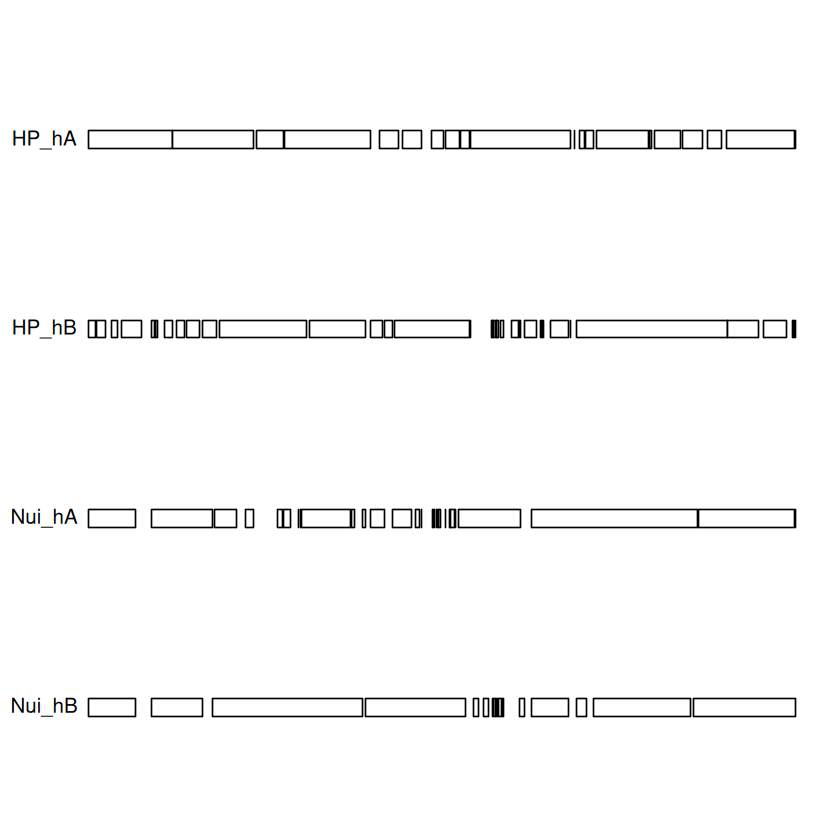

In [4]:
kp <- plotKaryotype(plot.type=2, genome = custom.genome, cytobands = custom.cytobands)

No predefined canonical chromosomes found for the requested genome. Applying a heuristic chromosome filtering.

To get the unfiltered genome, please set chromosomes="all" in the plotKaryotype call



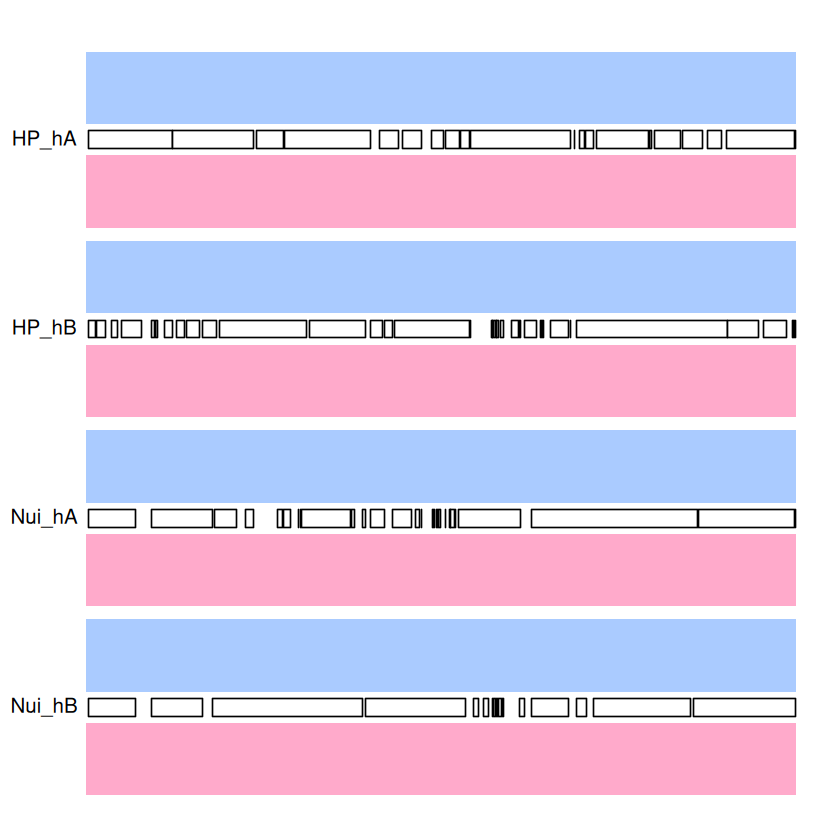

In [5]:
kp <- plotKaryotype(plot.type=2, genome = custom.genome, cytobands = custom.cytobands)
kpDataBackground(kp, data.panel = 1, col="#AACBFF")
kpDataBackground(kp, data.panel = 2, col="#FFAACB")

In [6]:
markers.M7h1 <- as.data.frame(read.table("chr2.markers_M7h1.txt",header = FALSE, sep="\t",stringsAsFactors=FALSE, quote=""))
markers.M7h2 <- as.data.frame(read.table("chr2.markers_M7h2.txt",header = FALSE, sep="\t",stringsAsFactors=FALSE, quote=""))
markers.Nuih1 <- as.data.frame(read.table("chr2.markers_Nuih1.txt",header = FALSE, sep="\t",stringsAsFactors=FALSE, quote=""))
markers.Nuih2 <- as.data.frame(read.table("chr2.markers_Nuih2.txt",header = FALSE, sep="\t",stringsAsFactors=FALSE, quote=""))

In [7]:
head(markers.M7h1)

,V1,V2,V3
,<chr>,<int>,<chr>
1,HP_hA,229781,lightgrey
2,HP_hA,229801,lightgrey
3,HP_hA,229820,lightgrey
4,HP_hA,229830,lightgrey
5,HP_hA,247149,lightgrey
6,HP_hA,247160,lightgrey


In [8]:
library(ggplot2)

In [62]:
png("phasedMarkersProgenyContigsChr2.final.4contigs.test.png", width=10, height=12, units="in", res = 150)

pp <- getDefaultPlotParams(plot.type=1)
pp$ideogramheight <- 15

kp <- plotKaryotype(plot.type=1, genome = custom.genome, cytobands = custom.cytobands, plot.params = pp, main = "Phased parental markers on progeny contigs - Chr2")
kpAddBaseNumbers(kp)
#kpAddCytobandLabels(kp, force.all=FALSE)
kpDataBackground(kp, data.panel = 1, col="white")
kpPoints(kp, chr = "HP_hA", x=markers.M7h1$V2, y=runif(n = 40, min = 0, max = 0.8), data.panel = 1, col=markers.M7h1$V3, cex = 0.7, pch=20)
kpPoints(kp, chr = "HP_hB", x=markers.M7h2$V2, y=runif(n = 40, min = 0, max = 0.8), data.panel = 1, col=markers.M7h2$V3, cex = 0.7, pch=20)
kpPoints(kp, chr = "Nui_hA", x=markers.Nuih1$V2, y=runif(n = 40, min = 0, max = 0.8), data.panel = 1, col=markers.Nuih1$V3, cex = 0.7, pch=20)
kpPoints(kp, chr = "Nui_hB", x=markers.Nuih2$V2, y=runif(n = 40, min = 0, max = 0.8), data.panel = 1, col=markers.Nuih2$V3, cex = 0.7, pch=20)

kpRect(kp, chr="HP_hA", x0=8000000, x1=11000000, y0=0, y1=1, col="#AAFFCBDD", data.panel="ideogram", border=NA)
kpRect(kp, chr="HP_hB", x0=8000000, x1=11000000, y0=0, y1=1, col="#AAFFCBDD", data.panel="ideogram", border=NA)
kpRect(kp, chr="Nui_hA", x0=8000000, x1=11000000, y0=0, y1=1, col="#AAFFCBDD", data.panel="ideogram", border=NA)
kpRect(kp, chr="Nui_hB", x0=8000000, x1=11000000, y0=0, y1=1, col="#AAFFCBDD", data.panel="ideogram", border=NA)

kpText(kp, chr="HP_hA", x=4000000, y=-0.3, labels = "h1tg000119l_1", cex = 0.8)
kpText(kp, chr="HP_hA", x=12000000, y=-0.3, labels = "h1tg000296l_1", cex = 0.8)

kpText(kp, chr="HP_hB", x=4000000, y=-0.3, labels = "h2tg000414l_1", cex = 0.8)
kpText(kp, chr="HP_hB", x=6000000, y=-0.4, labels = "h2tg000453l_1", cex = 0.8)
kpText(kp, chr="HP_hB", x=14000000, y=-0.4, labels = "h2tg000274l_1", cex = 0.8)
kpText(kp, chr="HP_hB", x=16000000, y=-0.3, labels = "h2tg000437l_1", cex = 0.8)
kpSegments(kp, chr="HP_hB", x0=7800000, x1=4000000, y0=-0.15, y1=-0.25)
kpSegments(kp, chr="HP_hB", x0=8800000, x1=7800000, y0=-0.15, y1=-0.35)
kpSegments(kp, chr="HP_hB", x0=10000000, x1=12000000, y0=-0.15, y1=-0.35)
kpSegments(kp, chr="HP_hB", x0=11500000, x1=16000000, y0=-0.15, y1=-0.25)

kpText(kp, chr="Nui_hA", x=9000000, y=-0.3, labels = "h1tg000862l_1", cex = 0.8)

kpText(kp, chr="Nui_hB", x=9000000, y=-0.3, labels = "h2tg000258l_1", cex = 0.8)

#addCytoLegend()
legend("top", legend = c("h1", "h2", "h3", "h4", "unassigned"), col = c("red", "blue", "orange", "green", "lightgrey"), cex = 0.8, pch = 15, horiz = "TRUE", title = "Phased parental markers")

#text(x=50, y=5, labels = "htgxxxxxx", col = "black", cex = 2)

dev.off()

#ggsave(filename = "phasedMarkersProgenyContigsChr2.final.4contigs.png", p, dpi = 300, units = "in", device='png')

No predefined canonical chromosomes found for the requested genome. Applying a heuristic chromosome filtering.

To get the unfiltered genome, please set chromosomes="all" in the plotKaryotype call



png 
  2

In [3]:
?kpAddCytobandLabels()

kpAddCytobandLabels {karyoploteR},R Documentation
karyoplot,(karyoplot object) A valid karyoplot object created by a call to plotKaryotype
cex,(numeric) The cex parameter for the cytoband labels
force.all,"(boolean) If true, all cytoband labels are plotted, even if they do not fit into the cytobands (Defaults to FALSE)"
clipping,"(boolean) Only used if zooming is active. If TRUE, the name will be not drawn out of the drawing are (i.e. in margins, etc) even if the data overflows the drawing area. If FALSE, the labels may overflow into the margins of the plot. (defaults to TRUE)"
...,Any other parameter to be passed to internal function calls. Specially useful for graphic parameters.


### 2. comparing genetic map prediction and contig prediction

In [8]:
compare.M7h1 <- as.data.frame(read.table("phasingFile.chr2.p.replaced.M7h1.compare.txt",header = FALSE, sep="\t",stringsAsFactors=FALSE, quote=""))
compare.M7h2 <- as.data.frame(read.table("phasingFile.chr2.p.replaced.M7h2.compare.txt",header = FALSE, sep="\t",stringsAsFactors=FALSE, quote=""))

In [9]:
head(compare.M7h1)

,V1,V2,V3
,<chr>,<int>,<chr>
1,M7h1_Chr2,229781,grey
2,M7h1_Chr2,229801,grey
3,M7h1_Chr2,229820,grey
4,M7h1_Chr2,229830,grey
5,M7h1_Chr2,247149,grey
6,M7h1_Chr2,247160,grey


In [13]:
pdf("phasedMarkersProgenyContigsChr2.compare.pdf", width=10, height=7)

kp <- plotKaryotype(plot.type=1, genome = custom.genome, cytobands = custom.cytobands, main = "Comparing phasing between genetic map and contigs")
kpAddBaseNumbers(kp)
kpAddCytobandLabels(kp, force.all=FALSE)
kpDataBackground(kp, data.panel = 1, col="white")
kpPoints(kp, chr = "Chr2M7h1", x=compare.M7h1$V2, y=runif(n = 40, min = 0, max = 0.8), data.panel = 1, col=compare.M7h1$V3, cex = 0.8, pch=20)
kpPoints(kp, chr = "Chr2M7h2", x=compare.M7h2$V2, y=runif(n = 40, min = 0, max = 0.8), data.panel = 1, col=compare.M7h2$V3, cex = 0.8, pch=20)

kpRect(kp, chr="Chr2M7h1", x0=8000000, x1=10000000, y0=0, y1=1, col="#AAFFCBDD", data.panel="ideogram", border=NA)
kpRect(kp, chr="Chr2M7h2", x0=8000000, x1=10000000, y0=0, y1=1, col="#AAFFCBDD", data.panel="ideogram", border=NA)

#addCytoLegend()
legend("top", legend = c("disagree", "agree", "Not sure"), col = c("red", "grey", "black"), cex = 0.8, pch = 15, horiz = "TRUE")

dev.off()

png 
  2